In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data = pd.read_csv(r'C:\Users\PC\OneDrive\İş masası\AI\Machine learning\data.csv')


In [4]:
data.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [6]:
data.shape

(36, 5)

In [7]:
data.corr(numeric_only=True)

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


In [8]:
data.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [9]:
X = data[['Weight', 'Volume']]
Y = data['CO2']

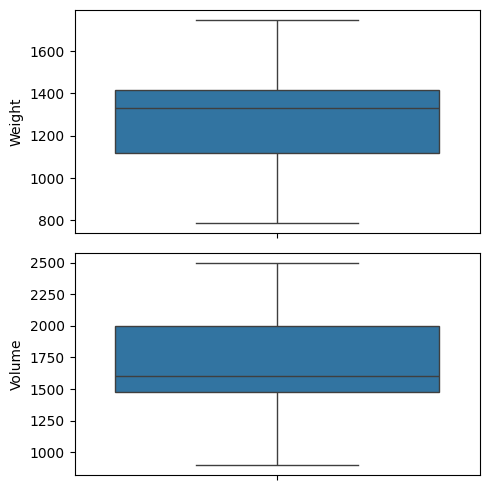

In [11]:
fig,axs = plt.subplots(2,figsize = (5,5))
plt1 = sns.boxplot(data['Weight'], ax = axs[0])
plt2 = sns.boxplot(data['Volume'], ax = axs[1])
plt.tight_layout()
plt.show()

<Axes: xlabel='CO2', ylabel='Density'>

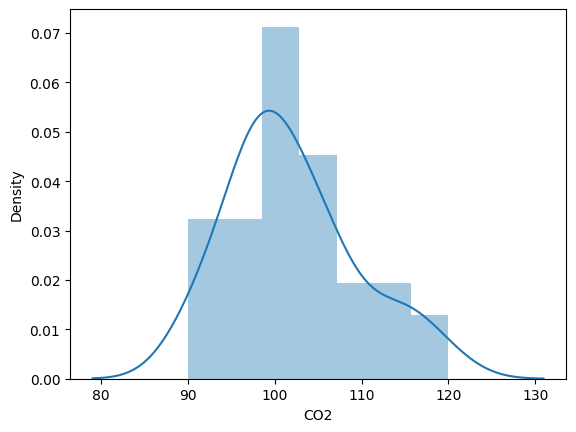

In [12]:
sns.distplot(data['CO2'])

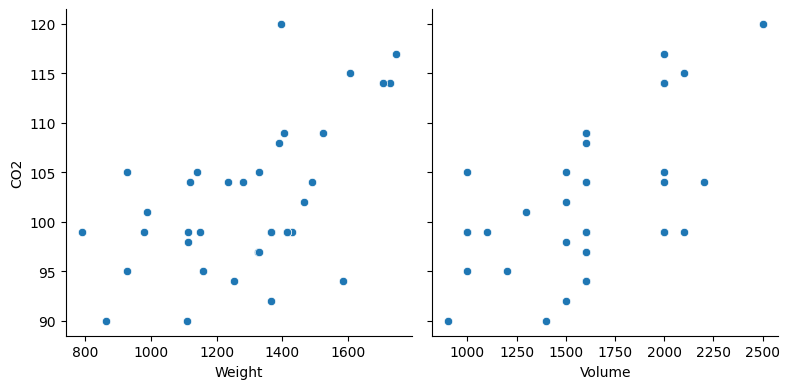

In [14]:
sns.pairplot(data,x_vars=['Weight','Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.tight_layout()
plt.show()

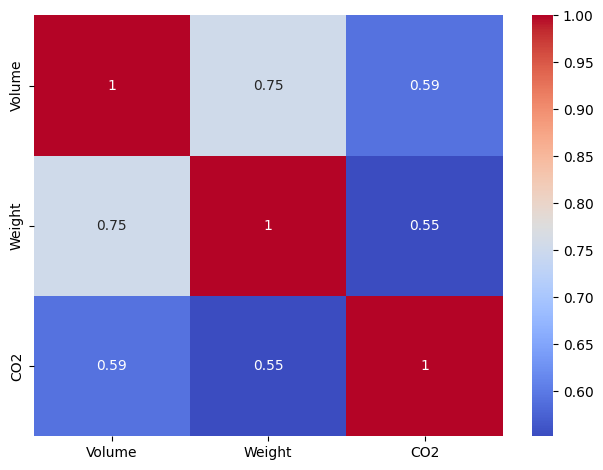

In [16]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap = 'coolwarm')
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test ,Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=100)


In [18]:
Y_train.shape

(25,)

In [19]:
Y_test.shape

(11,)

In [20]:
X_test.shape

(11, 2)

In [21]:
X_train.shape

(25, 2)

In [22]:
regression_model = LinearRegression().fit(X_train,Y_train)

In [24]:
print('intercept: ',regression_model.intercept_)
list(zip(X, regression_model.coef_))

intercept:  74.33882836589245


[('Weight', 0.017180064599637404), ('Volume', 0.0025046399866402963)]

In [28]:
Y_pred = regression_model.predict(X_test)
X_pred = regression_model.predict(X_train)

In [29]:
print('Prediction for test set: {}'.format(Y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [30]:
regression_model_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred})
regression_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [31]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
r2 = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636318
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018
